In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

import seaborn as sns

In [256]:
def range_mean(x,w):
    
    n = np.int_(len(x)/w)
    
    print(n)
    
    m_frame = []
    r_frame = []

    for i in range(n):
        m = np.mean(x[n*i:n*(i+1)])
        r = np.max(x[n*i:n*(i+1)])-np.min(x[n*i:n*(i+1)])
    
        m_frame = np.append(m_frame,m)
        r_frame = np.append(r_frame,r)
        
    return m_frame, r_frame

# Veðurgögn

#### www.hagstofan.is

In [257]:
dict_m = {'Janúar': 1, 'Febrúar': 2, 'Mars': 3, 'Apríl': 4, 'Maí': 5, 'Júní': 6, 'Júlí': 7, 'Ágúst': 8, 'September': 9, 'Október': 10, 'Nóvember': 11, 'Desember': 12}

## Hitastig
### Reykjavík / Akureyri
- Meðalhiti
- Hæsti hiti sem mældist í mánuðinum / á árinu
- Lægsti hiti sem mældist í mánuðinum / á árinu

Ártöl: 2000-2017   
Tíðni: Mánuðir

In [258]:
hitastig_df = pd.read_csv ('UMH11110.csv', sep = ";", header=0, skiprows= [0,1], encoding = "ISO-8859-1")

hitastig_rvk_df = hitastig_df[hitastig_df['Mælistöð'] == 'Reykjavík']
hitastig_rvk_df = hitastig_rvk_df.drop(labels = ['Mælistöð'], axis=1)
hitastig_rvk_df = hitastig_rvk_df.T
hitastig_rvk_df = hitastig_rvk_df.rename(columns={0: "Meðalhiti", 1: "Hæsti hiti", 2: "Lægsti hiti"})
hitastig_rvk_df = hitastig_rvk_df.iloc[1:]
hitastig_rvk_df = hitastig_rvk_df.replace(r'..', np.NaN, regex=True)
hitastig_rvk_df = hitastig_rvk_df.reset_index()
hitastig_rvk_df['month'] = hitastig_rvk_df['index'].str.split().apply(lambda r:r[1])
hitastig_rvk_df['year'] = hitastig_rvk_df['index'].str.split().apply(lambda r:r[0]).astype(int)
hitastig_rvk_df = hitastig_rvk_df.drop(columns=['index'])
hitastig_rvk_df['month'] = hitastig_rvk_df['month'].map(dict_m)
hitastig_rvk_df = hitastig_rvk_df[hitastig_rvk_df['year'].gt(2004) & hitastig_rvk_df['year'].lt(2017)].copy()
hitastig_rvk_df = hitastig_rvk_df.set_index(['year','month'])
hitastig_rvk_df = hitastig_rvk_df.sort_index()

#Vantar gögn fyrir hitastig í Reykjavík í Desember, gögn til á www.vedur.is.
#https://www.vedur.is/media/vedurstofan/utgafa/hlidarefni/des_2016_rvk.pdf
hitastig_rvk_df.loc[2016, 12]['Meðalhiti'] = 3.6
hitastig_rvk_df.loc[2016, 12]['Hæsti hiti'] = 10.1
hitastig_rvk_df.loc[2016, 12]['Lægsti hiti'] = -5.5

hitastig_ak_df = hitastig_df[hitastig_df['Mælistöð'] == 'Akureyri']
hitastig_ak_df = hitastig_ak_df.drop(labels = ['Mælistöð'], axis=1)
hitastig_ak_df = hitastig_ak_df.T
hitastig_ak_df = hitastig_ak_df.rename(columns={3: 'Meðalhiti', 4: 'Hæsti hiti', 5: 'Lægsti hiti'})
hitastig_ak_df = hitastig_ak_df.iloc[1:]
hitastig_ak_df['Meðalhiti'] = pd.to_numeric(hitastig_ak_df['Meðalhiti'], downcast='float')
hitastig_ak_df['Hæsti hiti'] = pd.to_numeric(hitastig_ak_df['Hæsti hiti'], downcast='float')
hitastig_ak_df['Lægsti hiti'] = pd.to_numeric(hitastig_ak_df['Lægsti hiti'], downcast='float')
hitastig_ak_df = hitastig_ak_df.reset_index()
hitastig_ak_df['month'] = hitastig_ak_df['index'].str.split().apply(lambda r:r[1])
hitastig_ak_df['year'] = hitastig_ak_df['index'].str.split().apply(lambda r:r[0]).astype(int)
hitastig_ak_df = hitastig_ak_df.drop(columns=['index'])
hitastig_ak_df['month'] = hitastig_ak_df['month'].map(dict_m)
hitastig_ak_df = hitastig_ak_df[hitastig_ak_df['year'].gt(2004) & hitastig_ak_df['year'].lt(2017)].copy()
hitastig_ak_df = hitastig_ak_df.set_index(['year','month'])
hitastig_ak_df = hitastig_ak_df.sort_index()

In [259]:
print(len(hitastig_rvk_df))
print(len(hitastig_ak_df))

hitastig_ak_df.head(12)
#hitastig_rvk_df.head(12)

144
144


Meðalhiti  Hæsti hiti  Lægsti hiti
year month                                    
2005 1           -0.6        11.7        -11.9
     2            0.8        13.3        -11.0
     3            2.5        14.4        -11.0
     4            2.9        14.6         -9.5
     5            4.4        15.5         -4.5
     6            9.5        19.6          1.2
     7           11.9        22.5          4.9
     8            9.5        21.0          1.4
     9            4.7        15.0         -2.8
     10           1.0        13.0         -8.2
     11          -0.3         9.6         -9.8
     12           0.7        12.3        -10.5

### Akureyri

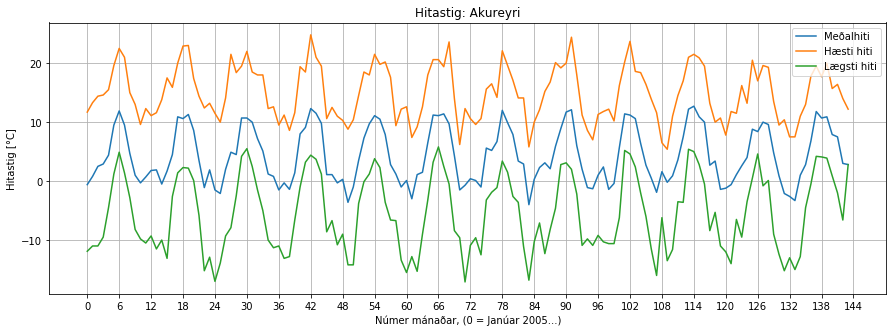

In [260]:
fig1 = plt.figure(figsize=(15,5))
plt.plot(range(len(hitastig_ak_df.values)),hitastig_ak_df['Meðalhiti'].values, label='Meðalhiti')
plt.plot(range(len(hitastig_ak_df.values)),hitastig_ak_df['Hæsti hiti'].values, label='Hæsti hiti')
plt.plot(range(len(hitastig_ak_df.values)),hitastig_ak_df['Lægsti hiti'].values, label='Lægsti hiti')
plt.xticks(list(range(0,145,6)))
plt.grid()
plt.ylabel('Hitastig [°C]')
plt.xlabel('Númer mánaðar, (0 = Janúar 2005...)')
plt.title('Hitastig: Akureyri')
plt.legend()
plt.show()

### Reykjavík

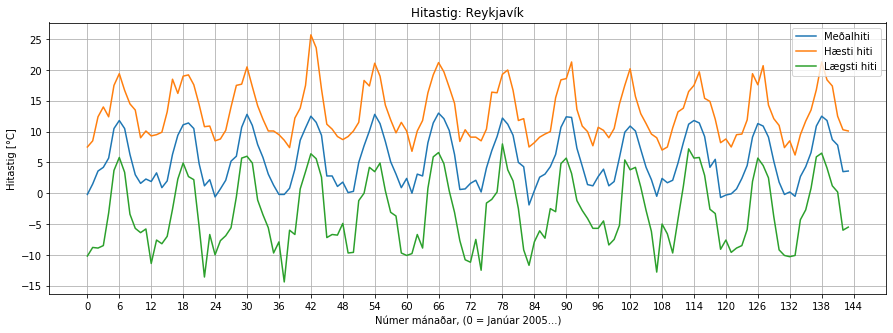

In [261]:
fig2 = plt.figure(figsize=(15,5))
plt.plot(range(len(hitastig_rvk_df.values)),hitastig_rvk_df['Meðalhiti'].values, label='Meðalhiti')
plt.plot(range(len(hitastig_rvk_df.values)),hitastig_rvk_df['Hæsti hiti'].values, label='Hæsti hiti')
plt.plot(range(len(hitastig_rvk_df.values)),hitastig_rvk_df['Lægsti hiti'].values, label='Lægsti hiti')
plt.xticks(list(range(0,145,6)))
plt.grid()
plt.ylabel('Hitastig [°C]')
plt.xlabel('Númer mánaðar, (0 = Janúar 2005...)')
plt.title('Hitastig: Reykjavík')
plt.legend()
plt.show()

## Úrkoma
### Reykjavík / Akureyri
- Meðalhiti
- Hæsti hiti sem mældist í mánuðinum / á árinu
- Lægsti hiti sem mældist í mánuðinum / á árinu

Ártöl: 2000-2016  
Tíðni: Mánuðir

In [262]:
urkoma_df = pd.read_csv ('UMH11120.csv', sep = ";", header=0, skiprows= [0,1], encoding = "ISO-8859-1")
urkoma_df = urkoma_df.replace(r'..', np.NaN)
urkoma_df['2016 Heildarúrkoma mánaðarins/ársins'] = urkoma_df['2016 Heildarúrkoma mánaðarins/ársins'].astype(float)
urkoma_df['2016 Mesta sólarhringsúrkoma sem mældist í mánuðinum/árinu (mælt kl. 09 að morgni)'] = urkoma_df['2016 Mesta sólarhringsúrkoma sem mældist í mánuðinum/árinu (mælt kl. 09 að morgni)'].astype(float)

urkoma_rvk_temp_df = urkoma_df[urkoma_df['Mælistöð'] == 'Reykjavík']
urkoma_rvk_temp_df = urkoma_rvk_temp_df.drop(labels = ['Mælistöð'], axis=1)
data_rvk = urkoma_rvk_temp_df.iloc[:, [0,33,34]].values
data_rvk = np.concatenate((data_rvk, np.ones((12,1))*2016), axis=1)

urkoma_ak_temp_df = urkoma_df[urkoma_df['Mælistöð'] == 'Akureyri']
urkoma_ak_temp_df = urkoma_ak_temp_df.drop(labels = ['Mælistöð'], axis=1)
data_ak = urkoma_ak_temp_df.iloc[:, [0,33,34]].values
data_ak = np.concatenate((data_ak, np.ones((12,1))*2016), axis=1)

years = range(2015,1999,-1)
for i, y in zip(range(15,-1,-1),years):
    
    temp_rvk = urkoma_rvk_temp_df.iloc[:, [0,2*i+1,2*i+2]].values
    temp_rvk = np.concatenate((temp_rvk, np.ones((12,1))*y), axis=1)
    data_rvk = np.append(data_rvk, temp_rvk, axis=0)
    
    temp_ak = urkoma_ak_temp_df.iloc[:, [0,2*i+1,2*i+2]].values
    temp_ak = np.concatenate((temp_ak, np.ones((12,1))*y), axis=1)
    data_ak = np.append(data_ak, temp_ak, axis=0)
    
urkoma_rvk_df = pd.DataFrame(data_rvk, columns=['month','Heildarúrkoma', 'Mesta Sólahringsúrkoma', 'year'])
urkoma_rvk_df['month'] = urkoma_rvk_df['month'].map(dict_m)
urkoma_rvk_df = urkoma_rvk_df[urkoma_rvk_df['year'].gt(2004) & urkoma_rvk_df['year'].lt(2017)].copy()
urkoma_rvk_df = urkoma_rvk_df.set_index(['year','month'])
urkoma_rvk_df = urkoma_rvk_df.sort_index()

#Vantar gögn fyrir úrkomu í Reykjavík í Desember, gögn til á www.vedur.is.
#https://www.vedur.is/media/vedurstofan/utgafa/hlidarefni/des_2016_rvk.pdf
urkoma_rvk_df.loc[2016, 12]['Heildarúrkoma'] = 146.7
urkoma_rvk_df.loc[2016, 12]['Mesta Sólahringsúrkoma'] = 15.6

urkoma_ak_df = pd.DataFrame(data_ak, columns=['month','Heildarúrkoma', 'Mesta Sólahringsúrkoma', 'year'])
urkoma_ak_df['month'] = urkoma_ak_df['month'].map(dict_m)
urkoma_ak_df = urkoma_ak_df[urkoma_ak_df['year'].gt(2004) & urkoma_ak_df['year'].lt(2017)].copy()
urkoma_ak_df = urkoma_ak_df.set_index(['year','month'])
urkoma_ak_df = urkoma_ak_df.sort_index()

In [263]:
print(len(urkoma_rvk_df))
print(len(urkoma_ak_df))

#urkoma_ak_df.head(12)
urkoma_rvk_df.head(12)

144
144


Heildarúrkoma Mesta Sólahringsúrkoma
year   month                                     
2005.0 1              66.3                   13.8
       2             105.2                   30.1
       3              36.6                    6.3
       4              76.9                   18.5
       5              13.8                    6.1
       6              40.2                   13.3
       7              46.6                      8
       8                72                   10.4
       9              41.1                   12.6
       10             49.1                    8.4
       11             59.6                     12
       12            135.6                   26.8

### Akureyri

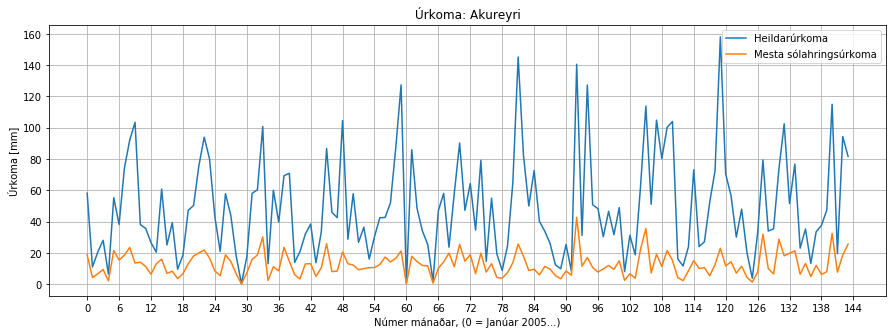

In [264]:
fig3 = plt.figure(figsize=(15,5))
plt.plot(range(len(urkoma_ak_df.values)),urkoma_ak_df['Heildarúrkoma'].values, label='Heildarúrkoma')
plt.plot(range(len(urkoma_ak_df.values)),urkoma_ak_df['Mesta Sólahringsúrkoma'].values, label='Mesta sólahringsúrkoma')
plt.xticks(list(range(0,145,6)))
plt.grid()
plt.ylabel('Úrkoma [mm]')
plt.xlabel('Númer mánaðar, (0 = Janúar 2005...)')
plt.title('Úrkoma: Akureyri')
plt.legend()
plt.show()

### Reykjavík

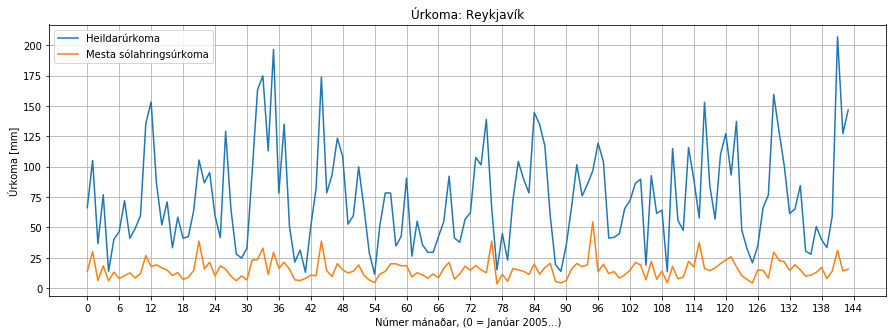

In [265]:
fig4 = plt.figure(figsize=(15,5))
plt.plot(range(len(urkoma_rvk_df.values)),urkoma_rvk_df['Heildarúrkoma'].values, label='Heildarúrkoma')
plt.plot(range(len(urkoma_rvk_df.values)),urkoma_rvk_df['Mesta Sólahringsúrkoma'].values, label='Mesta sólahringsúrkoma')
plt.xticks(list(range(0,145,6)))
plt.grid()
plt.ylabel('Úrkoma [mm]')
plt.xlabel('Númer mánaðar, (0 = Janúar 2005...)')
plt.title('Úrkoma: Reykjavík')
plt.legend()
plt.show()

## Sólskinsstundir
### Reykjavík / Akureyri
- Sólskinsstundir

Ártöl: 2000-2016  
Tíðni: Mánuðir

In [266]:
solskin_df = pd.read_csv ('UMH11165.csv', sep = ";", header=0, skiprows= [0,1], encoding = "ISO-8859-1")
solskin_ak_temp_df = solskin_df.iloc[:, 2::2]
solskin_ak_temp_df['month'] = range(1,13)
solskin_rvk_temp_df = solskin_df.iloc[:, 1::2]
solskin_rvk_temp_df['month'] = range(1,13)
solskin_rvk_temp_df = solskin_rvk_temp_df.replace(r'..', np.NaN)

In [267]:
data_rvk = solskin_rvk_temp_df.iloc[:, [17,0]].values
data_rvk = np.concatenate((data_rvk, np.ones((12,1))*2016), axis=1)

data_ak = solskin_ak_temp_df.iloc[:, [17,0]].values
data_ak = np.concatenate((data_ak, np.ones((12,1))*2016), axis=1)

years = range(2015,1999,-1)
for i, y in zip(range(1,16),years):
    temp_rvk = solskin_rvk_temp_df.iloc[:, [17,i]].values
    temp_rvk = np.concatenate((temp_rvk, np.ones((12,1))*y), axis=1)
    data_rvk = np.append(data_rvk, temp_rvk, axis=0)
    
    temp_ak = solskin_ak_temp_df.iloc[:, [17,i]].values
    temp_ak = np.concatenate((temp_ak, np.ones((12,1))*y), axis=1)
    data_ak = np.append(data_ak, temp_ak, axis=0)

solskin_rvk_df = pd.DataFrame(data_rvk, columns=['month','Sólskin', 'year'])
solskin_rvk_df = solskin_rvk_df[solskin_rvk_df['year'].gt(2004) & solskin_rvk_df['year'].lt(2017)].copy()
solskin_rvk_df = solskin_rvk_df.set_index(['year','month'])
solskin_rvk_df = solskin_rvk_df.sort_index()
solskin_rvk_df['Sólskin'] = pd.to_numeric(solskin_rvk_df['Sólskin'], downcast='float')

#Vantar gögn fyrir sólskinsstundir í Reykjavík í Desember, gögn til á www.vedur.is.
#https://www.vedur.is/media/vedurstofan/utgafa/hlidarefni/des_2016_rvk.pdf
solskin_rvk_df.loc[2016, 12]['Sólskin'] = 3.2

solskin_ak_df = pd.DataFrame(data_ak, columns=['month','Sólskin', 'year'])
solskin_ak_df = solskin_ak_df[solskin_ak_df['year'].gt(2004) & solskin_ak_df['year'].lt(2017)].copy()
solskin_ak_df = solskin_ak_df.set_index(['year','month'])
solskin_ak_df = solskin_ak_df.sort_index()    

In [268]:
print(len(solskin_rvk_df))
print(len(solskin_ak_df))

#solskin_ak_df.head(12)
solskin_rvk_df.tail(12)

144
144


Sólskin
year   month            
2016.0 1       22.200001
       2       86.500000
       3       85.599998
       4      202.500000
       5      145.899994
       6      132.100006
       7      239.600006
       8      192.500000
       9      135.000000
       10      40.299999
       11      18.100000
       12       3.200000

### Akureyri

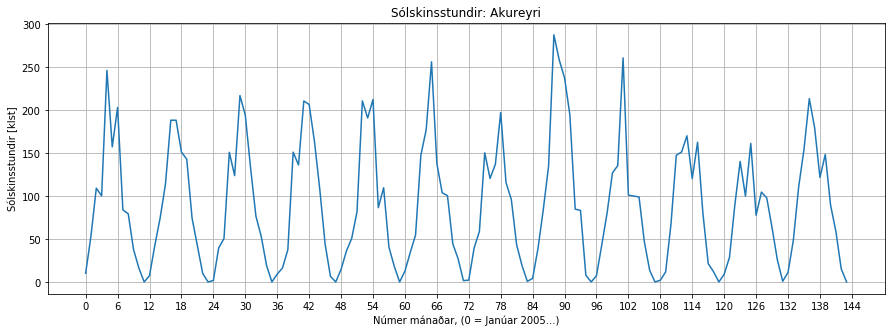

In [269]:
fig5 = plt.figure(figsize=(15,5))
plt.plot(range(len(solskin_ak_df.values)),solskin_ak_df.values)
plt.xticks(list(range(0,145,6)))
plt.grid()
plt.ylabel('Sólskinsstundir [klst]')
plt.xlabel('Númer mánaðar, (0 = Janúar 2005...)')
plt.title('Sólskinsstundir: Akureyri')
plt.show()

### Reykjavík

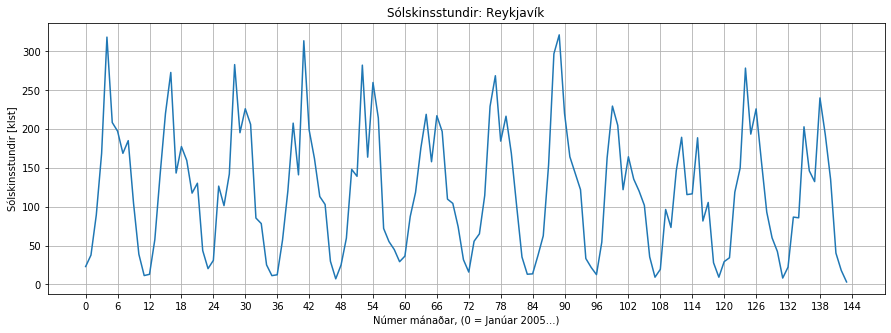

In [270]:
fig6 = plt.figure(figsize=(15,5))
plt.plot(range(len(solskin_rvk_df.values)),solskin_rvk_df.values)
plt.xticks(list(range(0,145,6)))
plt.grid()
plt.ylabel('Sólskinsstundir [klst]')
plt.xlabel('Númer mánaðar, (0 = Janúar 2005...)')
plt.title('Sólskinsstundir: Reykjavík')
plt.show()

# Umferðargögn

www.vegagerdin.is/upplysingar-og-utgafa/umferdin/tolfrumferdar/

## Meðalumferð á völdum stöðum á hringvegi
### Suðurland
- Hringvegur á Mýrdalssandi
- Hringvegur vestan Hvolsvallar
- Hringvegur á Hellisheiði
- Samtals fyrir svæði  

### Höfuðborgarsvæðið
- Hringvegur á Geithálsi
- Hringvegur við Úlfarsfell
- Samtals fyrir svæði  

### Vesturland
- Hringvegur um Hvalfjarðargöng
- Hringvegur við Hafnarfjall
- Hringvegur á Holtavörðuheiði
- Samtals fyrir svæði  

### Norðurland
- Hringvegur við Gljúfurá
- Hringvegur í Öxnadal
- Hringvegur í Kræklingahlíð
- Hringvegur á Mývatnsheiði
- Hringvegur á Mývatnsöræfum
- Samtals fyrir svæði  

### Austurland
- Hringvegur á Möðrudalsöræfum
- Hringvegur við Gíslastaðagerði
- Hringvegur við Hvalnes í Lóni
- Samtals fyrir svæði  

Ártöl: 2005-2021  
Tíðni: Mánuðir / Dagar

In [271]:
hringvegur_rvk_df = pd.read_excel('Tafla_1_2021_hra.xlsx', sheet_name='Samtals', header = 6, index_col = [0,1], usecols='A,B,E,L', skiprows=[7,8,21,34,47,60,73,86,99,112,125,138,151,164],skipfooter=65)
hringvegur_rvk_df = hringvegur_rvk_df.reset_index()
hringvegur_rvk_df = hringvegur_rvk_df.rename(columns={'level_0': "year", 'level_1': "month"})
hringvegur_rvk_df = hringvegur_rvk_df.rename(columns={'Hringvegur á Hellisheiði': 'Hellisheiði', 'Hringvegur um Hvalfjarðargöng': 'Hvalfjarðargöng'})
hringvegur_rvk_df['month'] = hringvegur_rvk_df['month'].str.replace(' ', '')
hringvegur_rvk_df['month'] = hringvegur_rvk_df['month'].map(dict_m)
hringvegur_rvk_df = hringvegur_rvk_df.set_index(['year','month'])
hringvegur_rvk_df = hringvegur_rvk_df.sort_index()
hringvegur_rvk_df['Samtals'] = hringvegur_rvk_df['Hellisheiði'] + hringvegur_rvk_df['Hvalfjarðargöng']

hringvegur_ak_df = pd.read_excel('Tafla_1_2021_hra.xlsx', sheet_name='Samtals', header = 6, index_col = [0,1], usecols='A,B,R,T', skiprows=[7,8,21,34,47,60,73,86,99,112,125,138,151,164],skipfooter=65)
hringvegur_ak_df = hringvegur_ak_df.reset_index()
hringvegur_ak_df = hringvegur_ak_df.rename(columns={'level_0': "year", 'level_1': "month"})
hringvegur_ak_df = hringvegur_ak_df.rename(columns={'Hringvegur í Öxnadal': 'Öxnadalur', 'Hringvegur á Mývatnsheiði': 'Mývatnsheiði'})
hringvegur_ak_df['month'] = hringvegur_ak_df['month'].str.replace(' ', '')
hringvegur_ak_df['month'] = hringvegur_ak_df['month'].map(dict_m)
hringvegur_ak_df = hringvegur_ak_df.set_index(['year','month'])
hringvegur_ak_df = hringvegur_ak_df.sort_index()
hringvegur_ak_df['Samtals'] = hringvegur_ak_df['Öxnadalur'] + hringvegur_ak_df['Mývatnsheiði']

n = len(hringvegur_rvk_df)

In [272]:
print(len(hringvegur_rvk_df))
print(len(hringvegur_ak_df))

#hringvegur_ak_df.head(12)
hringvegur_rvk_df.head(12)

144
144


Hellisheiði  Hvalfjarðargöng       Samtals
year month                                            
2005 1      3509.000000           2931.0   6440.000000
     2      4318.000000           3410.0   7728.000000
     3      5097.382724           4212.0   9309.382724
     4      5511.000000           4172.0   9683.000000
     5      6871.000000           5017.0  11888.000000
     6      7967.137456           6080.0  14047.137456
     7      9112.000000           7012.0  16124.000000
     8      7621.000000           6206.0  13827.000000
     9      6394.000000           4976.0  11370.000000
     10     5447.000000           4295.0   9742.000000
     11     4934.000000           4208.0   9142.000000
     12     4625.000000           3953.0   8578.000000

### Reykjavík

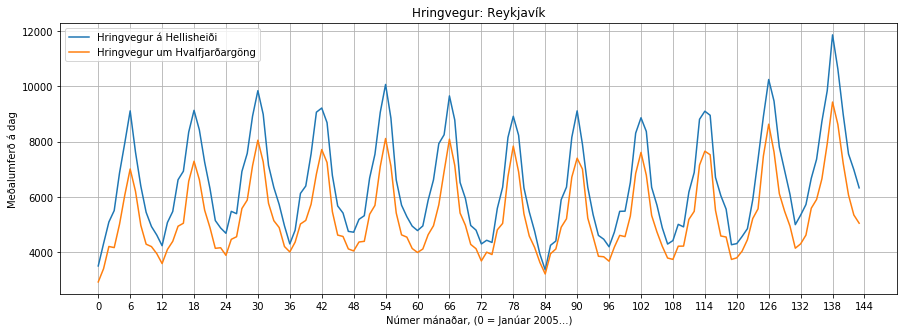

In [273]:
fig7 = plt.figure(figsize=(15,5))
plt.plot(range(len(hringvegur_rvk_df['Hellisheiði'].values)),hringvegur_rvk_df['Hellisheiði'].values, label='Hringvegur á Hellisheiði')
plt.plot(range(len(hringvegur_rvk_df['Hvalfjarðargöng'].values)),hringvegur_rvk_df['Hvalfjarðargöng'].values, label='Hringvegur um Hvalfjarðargöng')
plt.xticks(list(range(0,145,6)))
plt.grid()
plt.ylabel('Meðalumferð á dag')
plt.xlabel('Númer mánaðar, (0 = Janúar 2005...)')
plt.title('Hringvegur: Reykjavík')
plt.legend()
plt.show()

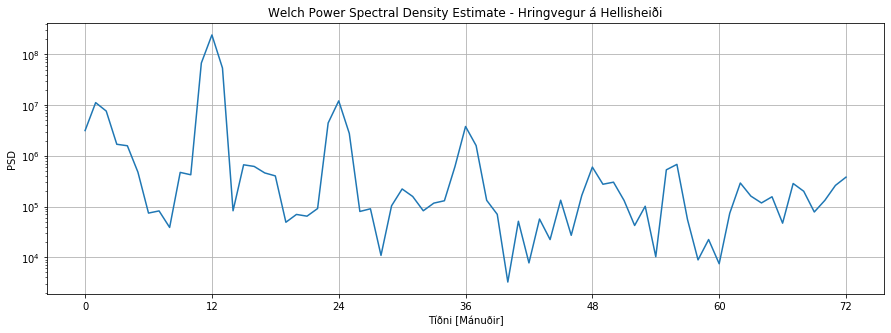

In [274]:
fig7_spec1 = plt.figure(figsize=(15,5))

f, Pxx_den = signal.welch(hringvegur_rvk_df['Hellisheiði'], scaling = 'density')
max_Pxx = np.argmax(Pxx_den)
plt.xticks(list(range(0,73,12)))
plt.semilogy(f*n, Pxx_den)
plt.xlabel('Tíðni [Mánuðir]')
plt.ylabel('PSD')
plt.title('Welch Power Spectral Density Estimate - Hringvegur á Hellisheiði')
plt.grid()
plt.show()

Hápunktar á (tíðnisviði?) eru í 12, 24 og 36 mánuðum.

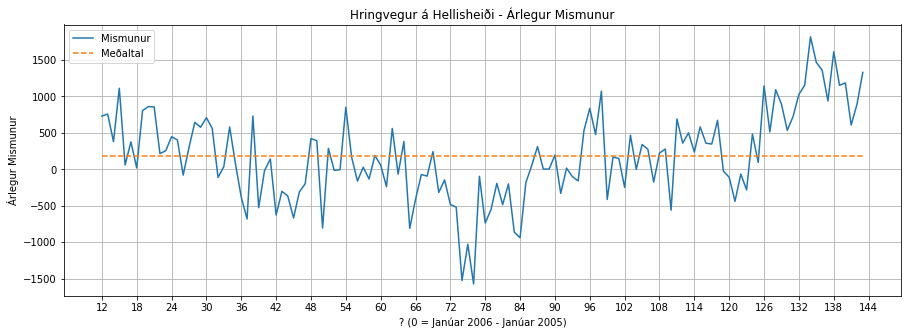

In [275]:
hellisheidi_diff_df = hringvegur_rvk_df['Hellisheiði'].diff(periods=12)
hellisheidi_diff_mean = np.mean(hellisheidi_diff_df)

fig7b = plt.figure(figsize=(15,5))
plt.plot(range(len(hellisheidi_diff_df)),hellisheidi_diff_df.values, label='Mismunur')
plt.plot([12,143],[hellisheidi_diff_mean, hellisheidi_diff_mean], '--', label='Meðaltal')
plt.xticks(list(range(12,145,6)))
plt.grid()
plt.ylabel('Árlegur Mismunur')
plt.xlabel('? (0 = Janúar 2006 - Janúar 2005)')
plt.title('Hringvegur á Hellisheiði - Árlegur Mismunur')
plt.legend()
plt.show()

In [276]:
hellisheidi_diff_df = hellisheidi_diff_df.drop(index=[2005])

11
12


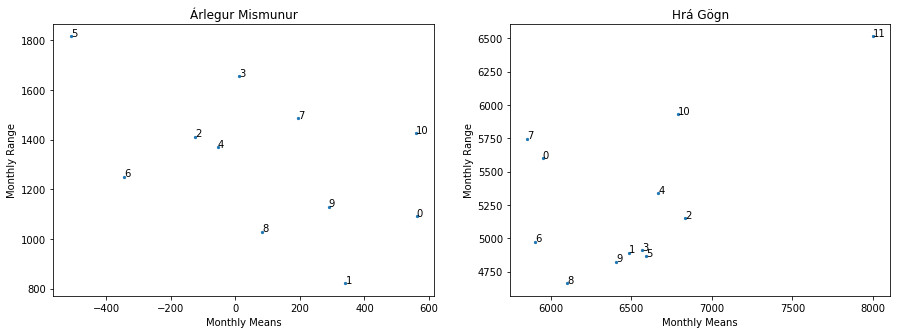

In [277]:
fig7_rm = plt.figure(figsize=(15,5))

m,r = range_mean(hellisheidi_diff_df.values,12)
plt.subplot(1, 2, 1)
plt.scatter(m,r,s = 5)
plt.xlabel('Monthly Means')
plt.ylabel('Monthly Range')
plt.title('Árlegur Mismunur')
for i in range(len(m)):
    plt.annotate(i, ([m[i],r[i]]))

m,r = range_mean(hringvegur_rvk_df['Hellisheiði'].values,12)
plt.subplot(1, 2, 2)
plt.scatter(m,r,s = 5)
plt.xlabel('Monthly Means')
plt.ylabel('Monthly Range')
plt.title('Hrá Gögn')
for i in range(len(m)):
    plt.annotate(i, ([m[i],r[i]]))

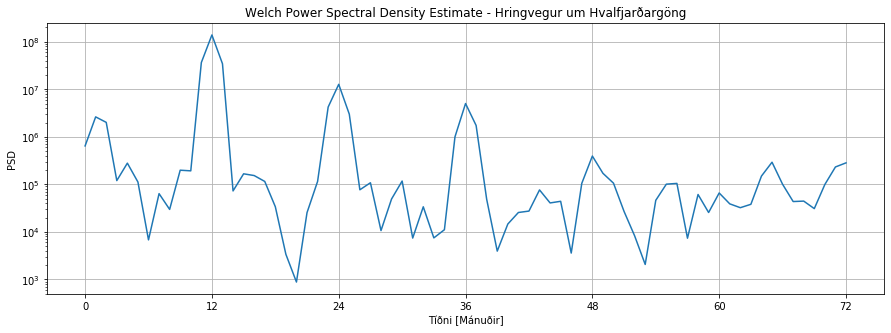

In [278]:
fig7_spec2 = plt.figure(figsize=(15,5))

f, Pxx_den = signal.welch(hringvegur_rvk_df['Hvalfjarðargöng'], scaling = 'density')
max_Pxx = np.argmax(Pxx_den)
plt.xticks(list(range(0,73,12)))
plt.semilogy(f*n, Pxx_den)
plt.xlabel('Tíðni [Mánuðir]')
plt.ylabel('PSD')
plt.title('Welch Power Spectral Density Estimate - Hringvegur um Hvalfjarðargöng')
plt.grid()
plt.show()

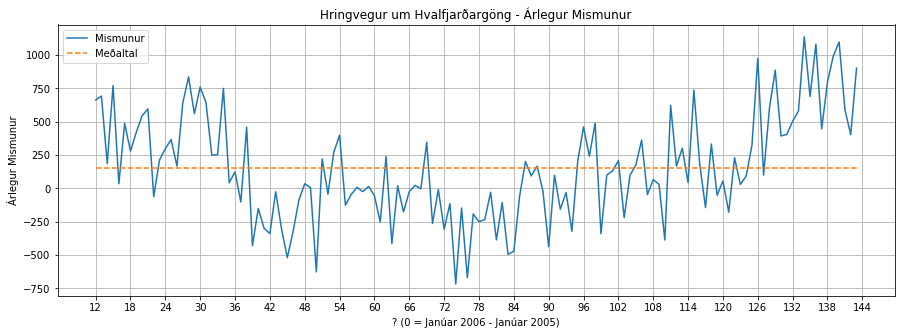

In [279]:
hvalfjardargong_diff_df = hringvegur_rvk_df['Hvalfjarðargöng'].diff(periods=12)
hvalfjardargong_diff_mean = np.mean(hvalfjardargong_diff_df)

fig7c = plt.figure(figsize=(15,5))
plt.plot(range(len(hvalfjardargong_diff_df)),hvalfjardargong_diff_df.values, label='Mismunur')
plt.plot([12,143],[hvalfjardargong_diff_mean, hvalfjardargong_diff_mean], '--', label='Meðaltal')
plt.xticks(list(range(12,145,6)))
plt.grid()
plt.ylabel('Árlegur Mismunur')
plt.xlabel('? (0 = Janúar 2006 - Janúar 2005)')
plt.title('Hringvegur um Hvalfjarðargöng - Árlegur Mismunur')
plt.legend()
plt.show()

In [280]:
hvalfjardargong_diff_df = hvalfjardargong_diff_df.drop(index=[2005])

11
12


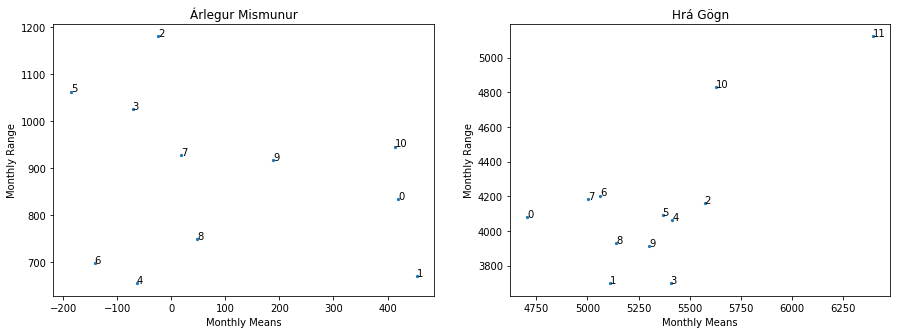

In [281]:
fig7_rm = plt.figure(figsize=(15,5))

m,r = range_mean(hvalfjardargong_diff_df.values,12)
plt.subplot(1, 2, 1)
plt.scatter(m,r,s = 5)
plt.xlabel('Monthly Means')
plt.ylabel('Monthly Range')
plt.title('Árlegur Mismunur')
for i in range(len(m)):
    plt.annotate(i, ([m[i],r[i]]))

m,r = range_mean(hringvegur_rvk_df['Hvalfjarðargöng'].values,12)
plt.subplot(1, 2, 2)
plt.scatter(m,r,s = 5)
plt.xlabel('Monthly Means')
plt.ylabel('Monthly Range')
plt.title('Hrá Gögn')
for i in range(len(m)):
    plt.annotate(i, ([m[i],r[i]]))

### Akureyri

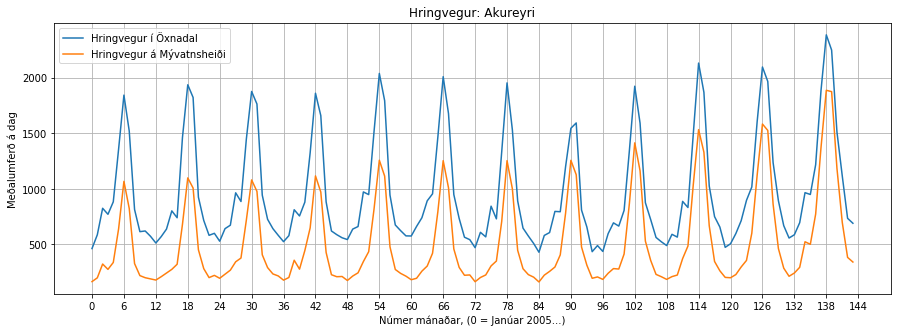

In [282]:
fig8 = plt.figure(figsize=(15,5))
plt.plot(range(len(hringvegur_ak_df['Öxnadalur'].values)),hringvegur_ak_df['Öxnadalur'].values, label='Hringvegur í Öxnadal')
plt.plot(range(len(hringvegur_ak_df['Mývatnsheiði'].values)),hringvegur_ak_df['Mývatnsheiði'].values, label='Hringvegur á Mývatnsheiði')
plt.xticks(list(range(0,145,6)))
plt.grid()
plt.ylabel('Meðalumferð á dag')
plt.xlabel('Númer mánaðar, (0 = Janúar 2005...)')
plt.title('Hringvegur: Akureyri')
plt.legend()
plt.show()

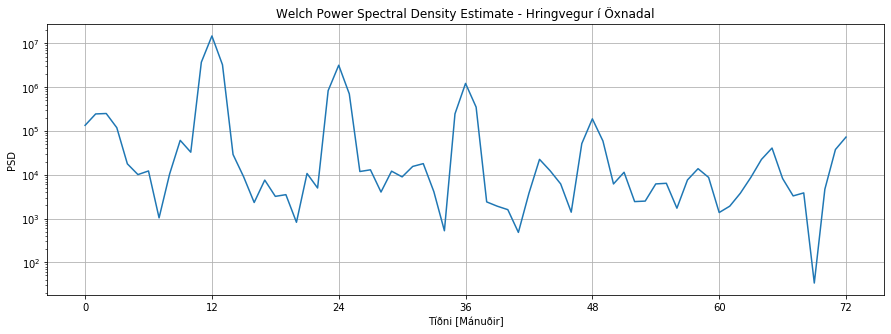

In [283]:
fig8_spec1 = plt.figure(figsize=(15,5))

f, Pxx_den = signal.welch(hringvegur_ak_df['Öxnadalur'], scaling = 'density')
max_Pxx = np.argmax(Pxx_den)
plt.xticks(list(range(0,73,12)))
plt.semilogy(f*n, Pxx_den)
plt.xlabel('Tíðni [Mánuðir]')
plt.ylabel('PSD')
plt.title('Welch Power Spectral Density Estimate - Hringvegur í Öxnadal')
plt.grid()
plt.show()

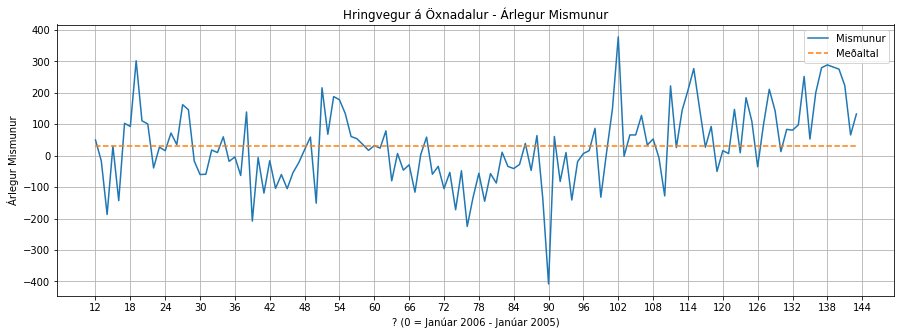

In [284]:
oxnadalur_diff_df = hringvegur_ak_df['Öxnadalur'].diff(periods=12)
oxnadalur_diff_mean = np.mean(oxnadalur_diff_df)

fig8b = plt.figure(figsize=(15,5))
plt.plot(range(len(oxnadalur_diff_df)), oxnadalur_diff_df.values, label='Mismunur')
plt.plot([12,143],[oxnadalur_diff_mean, oxnadalur_diff_mean], '--', label='Meðaltal')
plt.xticks(list(range(12,145,6)))
plt.grid()
plt.ylabel('Árlegur Mismunur')
plt.xlabel('? (0 = Janúar 2006 - Janúar 2005)')
plt.title('Hringvegur á Öxnadalur - Árlegur Mismunur')
plt.legend()
plt.show()

In [285]:
oxnadalur_diff_df = oxnadalur_diff_df.drop(index=[2005])

11
12


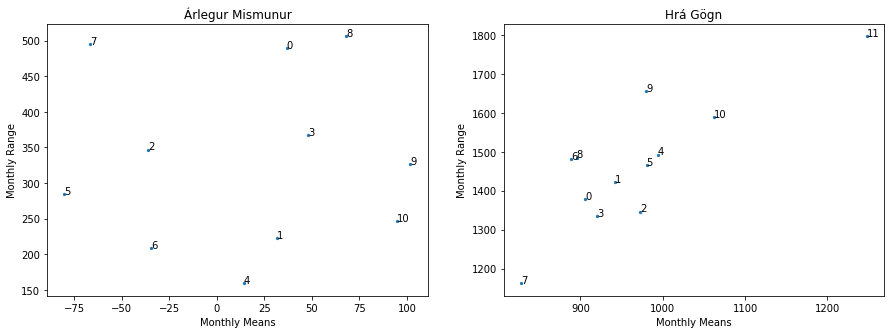

In [286]:
fig8_rm = plt.figure(figsize=(15,5))

m,r = range_mean(oxnadalur_diff_df.values,12)
plt.subplot(1, 2, 1)
plt.scatter(m,r,s = 5)
plt.xlabel('Monthly Means')
plt.ylabel('Monthly Range')
plt.title('Árlegur Mismunur')
for i in range(len(m)):
    plt.annotate(i, ([m[i],r[i]]))

m,r = range_mean(hringvegur_ak_df['Öxnadalur'].values,12)
plt.subplot(1, 2, 2)
plt.scatter(m,r,s = 5)
plt.xlabel('Monthly Means')
plt.ylabel('Monthly Range')
plt.title('Hrá Gögn')
for i in range(len(m)):
    plt.annotate(i, ([m[i],r[i]]))

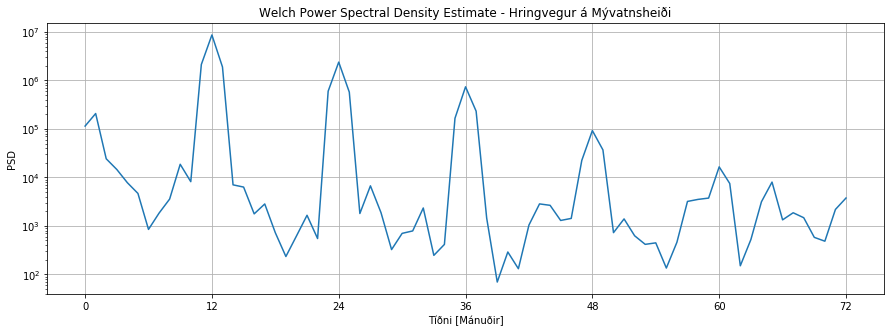

In [287]:
fig8_spec2 = plt.figure(figsize=(15,5))

f, Pxx_den = signal.welch(hringvegur_ak_df['Mývatnsheiði'], scaling = 'density')
max_Pxx = np.argmax(Pxx_den)
plt.xticks(list(range(0,73,12)))
plt.semilogy(f*n, Pxx_den)
plt.xlabel('Tíðni [Mánuðir]')
plt.ylabel('PSD')
plt.title('Welch Power Spectral Density Estimate - Hringvegur á Mývatnsheiði')
plt.grid()
plt.show()

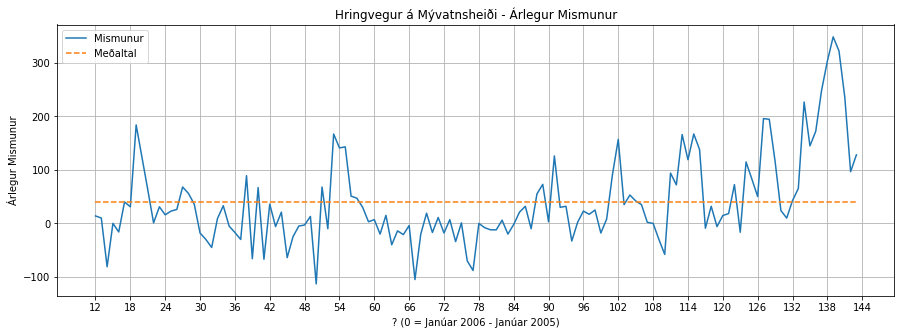

In [288]:
myvatnsheidi_diff_df = hringvegur_ak_df['Mývatnsheiði'].diff(periods=12)
myvatnsheidi_diff_mean = np.mean(myvatnsheidi_diff_df)

fig8c = plt.figure(figsize=(15,5))
plt.plot(range(len(myvatnsheidi_diff_df)), myvatnsheidi_diff_df.values, label='Mismunur')
plt.plot([12,143],[myvatnsheidi_diff_mean, myvatnsheidi_diff_mean], '--', label='Meðaltal')
plt.xticks(list(range(12,145,6)))
plt.grid()
plt.ylabel('Árlegur Mismunur')
plt.xlabel('? (0 = Janúar 2006 - Janúar 2005)')
plt.title('Hringvegur á Mývatnsheiði - Árlegur Mismunur')
plt.legend()
plt.show()

In [289]:
myvatnsheidi_diff_df = myvatnsheidi_diff_df.drop(index=[2005])

11
12


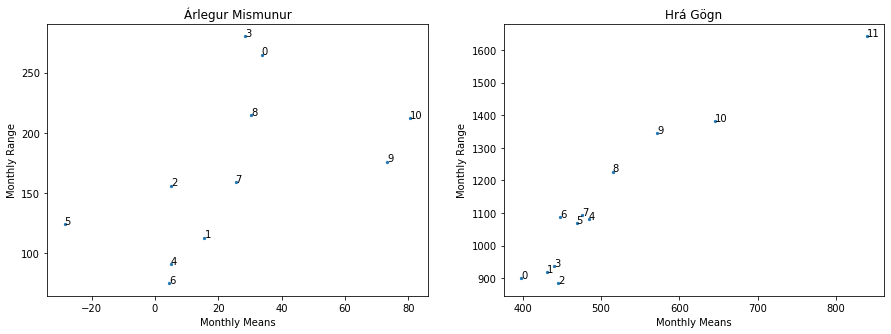

In [290]:
fig8_rm = plt.figure(figsize=(15,5))

m,r = range_mean(myvatnsheidi_diff_df.values,12)
plt.subplot(1, 2, 1)
plt.scatter(m,r,s = 5)
plt.xlabel('Monthly Means')
plt.ylabel('Monthly Range')
plt.title('Árlegur Mismunur')
for i in range(len(m)):
    plt.annotate(i, ([m[i],r[i]]))

m,r = range_mean(hringvegur_ak_df['Mývatnsheiði'].values,12)
plt.subplot(1, 2, 2)
plt.scatter(m,r,s = 5)
plt.xlabel('Monthly Means')
plt.ylabel('Monthly Range')
plt.title('Hrá Gögn')
for i in range(len(m)):
    plt.annotate(i, ([m[i],r[i]]))

# Fylgni Gagna

## Hitastig og Umferð

In [315]:
hitastig_hringvegur_rvk_df = hitastig_rvk_df.merge(hringvegur_rvk_df, how='outer', on = ['year','month'])
hitastig_hringvegur_ak_df = hitastig_ak_df.merge(hringvegur_ak_df, how='outer', on = ['year','month'])

### Reykjavík

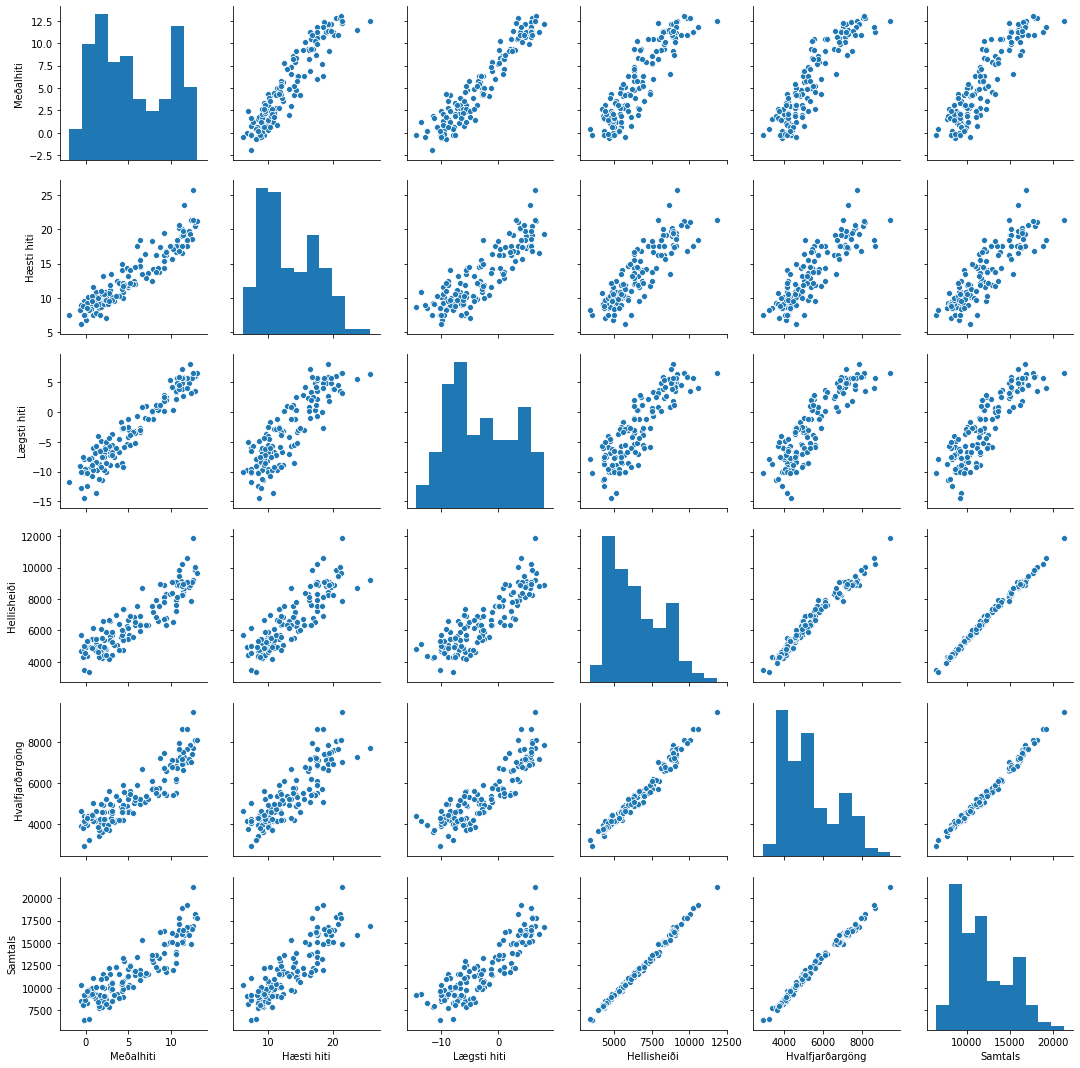

In [316]:
sns.pairplot(hitastig_hringvegur_rvk_df, kind="scatter")

Greinilegt að það er fylgni milli *hitastigs á Reykjavík* og *umferðar á Hringvegi á Hellisheiði og um Hvalfjarðargöng*, en það er líklegast vegna þess að það er fylgni milli hitastigs og árstíðar annarsvegar og hitastigs og umferðar hinsvegar.

### Akureyri

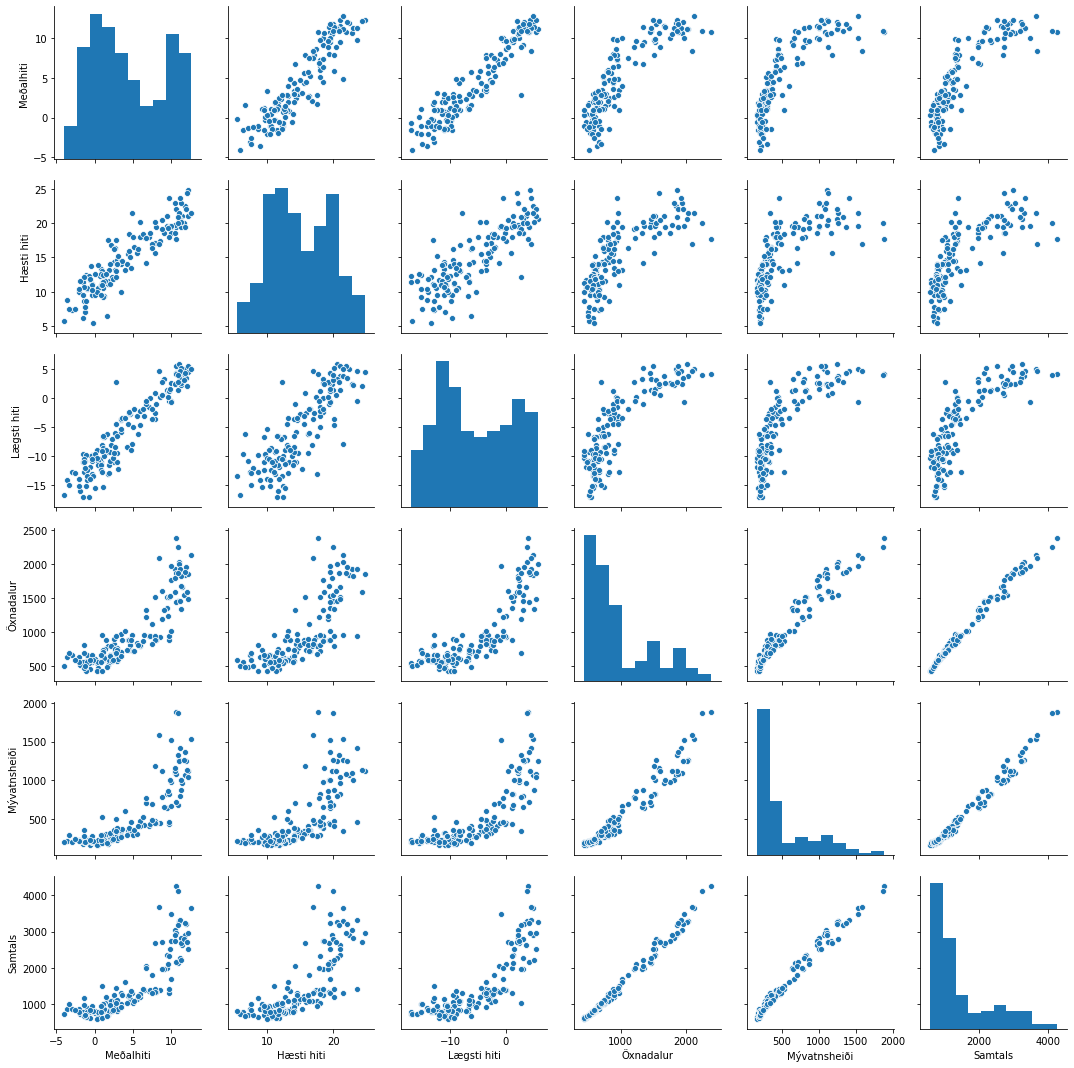

In [317]:
sns.pairplot(hitastig_hringvegur_ak_df, kind="scatter")

Greinilegt að það er fylgni milli *hitastigs á Akureyri* og *umferðar á Hringvegi í Ölxnadal og Mývatnsheiði*, en það er líklegast vegna þess að það er fylgni milli hitastigs og árstíðar annarsvegar og hitastigs og umferðar hinsvegar. Fylgnin, virðist samt vera minni en í Reykjavík.

In [318]:
hitastig_hringvegur_rvk_samtals_df = hitastig_rvk_df.merge(hringvegur_rvk_df, how='outer', on = ['year','month'])
hitastig_hringvegur_ak_df = hitastig_ak_df.merge(hringvegur_ak_df, how='outer', on = ['year','month'])

## Úrkoma og Umferð

In [319]:
urkoma_hringvegur_rvk_df = urkoma_rvk_df.merge(hringvegur_rvk_df, how='outer', on = ['year','month'])
urkoma_hringvegur_ak_df = urkoma_ak_df.merge(hringvegur_ak_df, how='outer', on = ['year','month'])

### Reykjavík

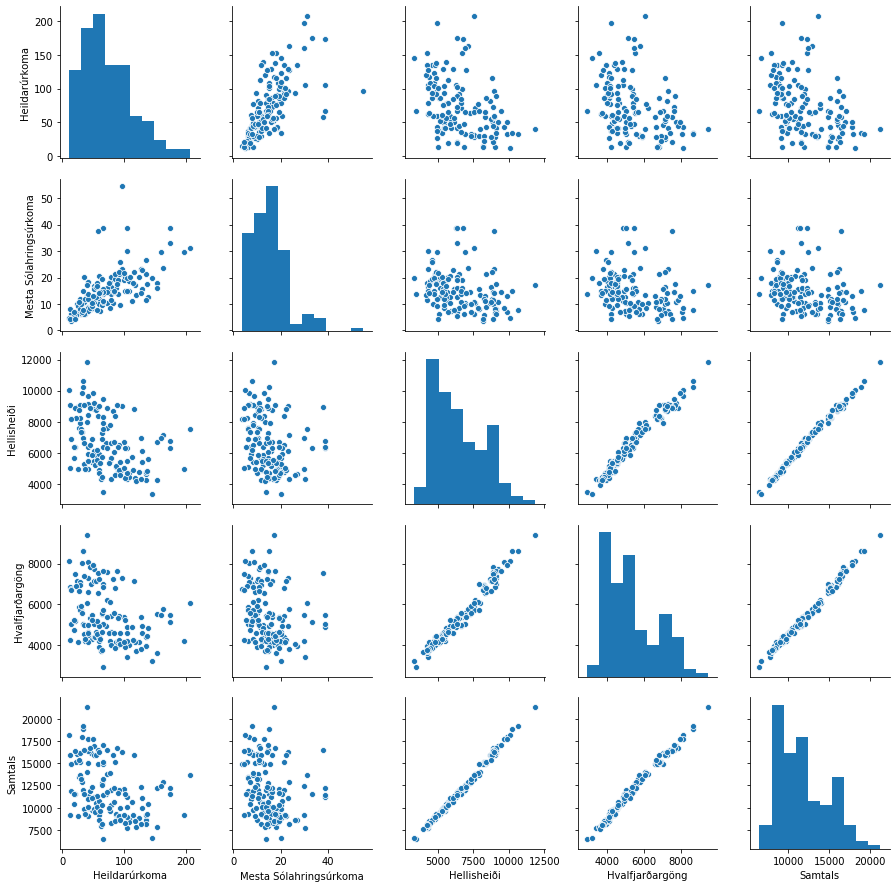

In [320]:
sns.pairplot(urkoma_hringvegur_rvk_df, kind="scatter")

Það er ekki augljós fylgni milli úrkomu og umferðar í Reykjavik.

### Akureyri

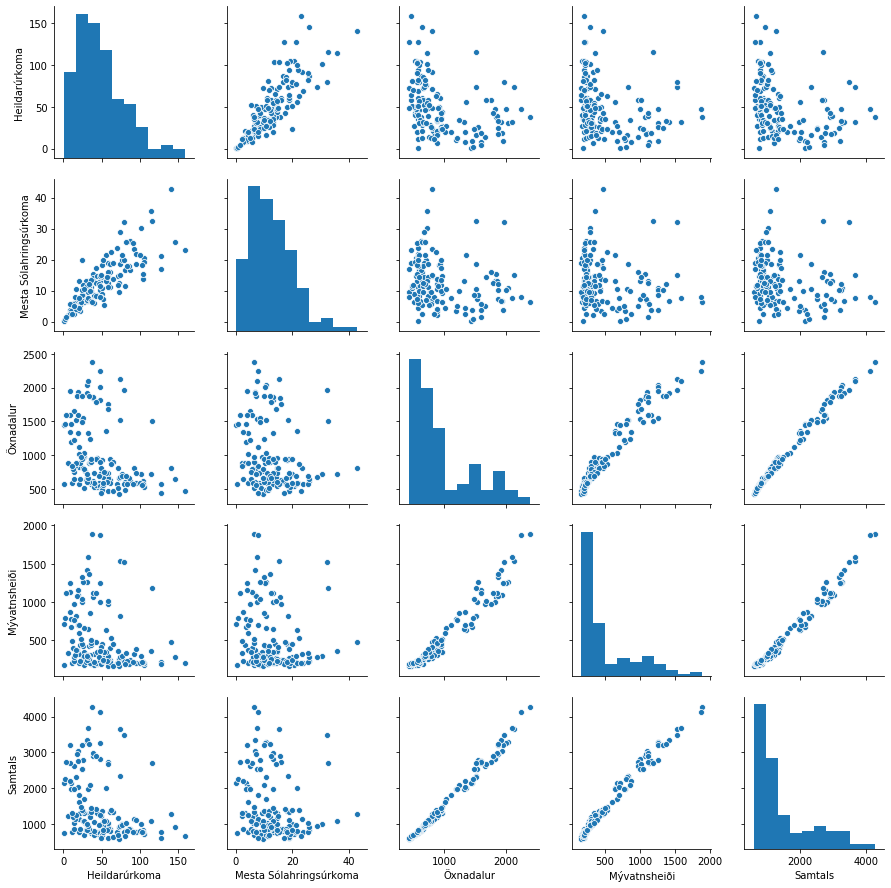

In [321]:
sns.pairplot(urkoma_hringvegur_ak_df, kind="scatter")

Það er ekki augljós fylgni milli úrkomu og umferðar á Akureyri

## Sólskin og Umferð

In [322]:
solskin_hringvegur_rvk_df = solskin_rvk_df.merge(hringvegur_rvk_df, how='outer', on = ['year','month'])
solskin_hringvegur_ak_df = solskin_ak_df.merge(hringvegur_ak_df, how='outer', on = ['year','month'])

### Reykjavík

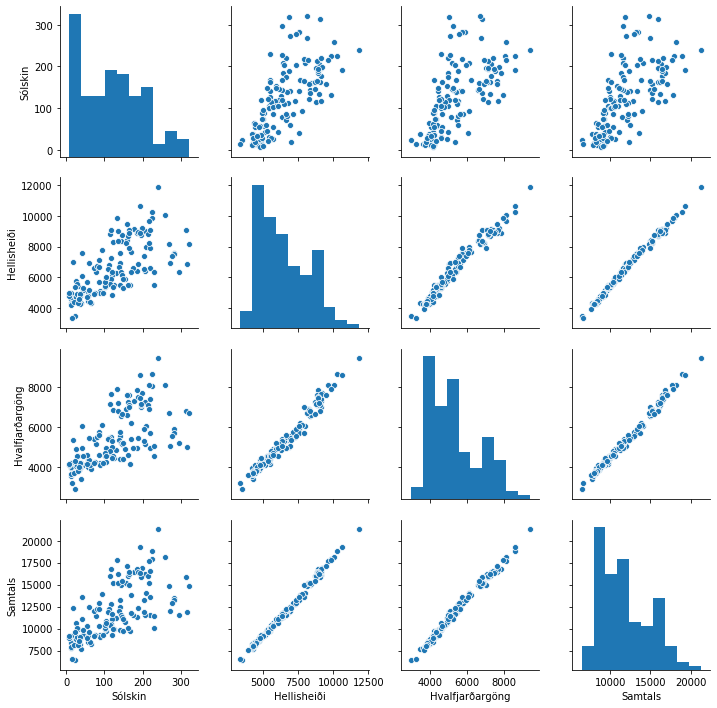

In [323]:
sns.pairplot(solskin_hringvegur_rvk_df, kind="scatter")

Það er fylgni milli sólskinstunda og umferðar, en sú fylgni gæti mögulega verið vegna fleiri sólskinsstunda á sumrin en á veturna.

### Akureyri

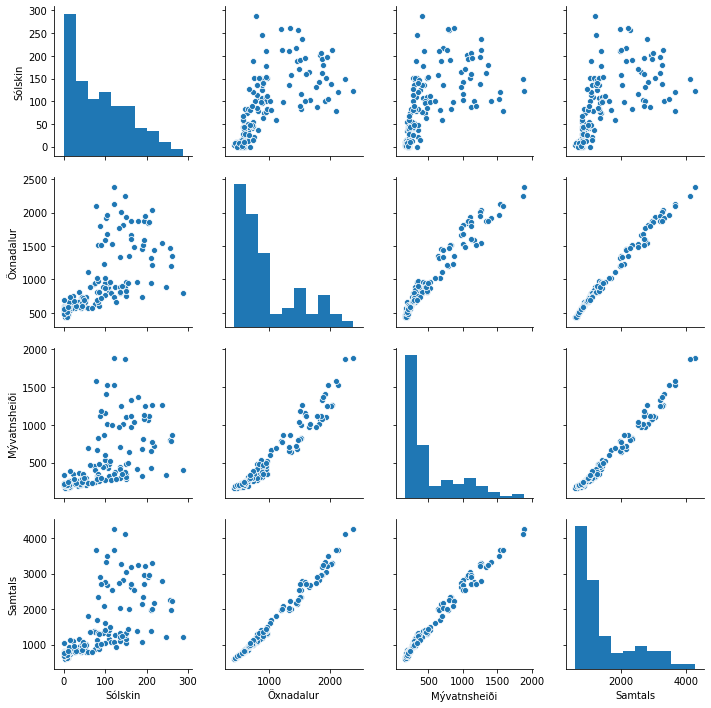

In [324]:
sns.pairplot(solskin_hringvegur_ak_df, kind="scatter")

Það er fylgni milli sólskinstunda og umferðar, en sú fylgni gæti mögulega verið vegna fleiri sólskinsstunda á sumrin en á veturna.

# Módel - Í vinnslu

In [329]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook

In [330]:
def optimize_ARIMA(order_list, endog, exog):
    """
        Return dataframe with parameters and corresponding AIC
        https://towardsdatascience.com/advanced-time-series-analysis-with-arma-and-arima-a7d9b589ed6d
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, exog, order=order).fit(disp=-1)
            #model = sm.tsa.ARIMA(endog=endog, exog=exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [370]:
ps = range(0, 8, 1)
d = 2
qs = range(0, 8, 1)

order_list = np.array(np.meshgrid(ps, d, qs)).T.reshape(-1,3) # Create a list with all possible combination of parameters   
result_df = optimize_ARIMA(order_list, endog=hringvegur_rvk_df['Samtals'].values, exog=hitastig_rvk_df['Meðalhiti'].values)

result_df


C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:693: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:695: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Public\Anaconda3\lib\site

,"(p, d, q)",AIC
0,"[5, 2, 5]",2398.238443
1,"[4, 2, 6]",2405.948194
2,"[6, 2, 3]",2413.605653
3,"[7, 2, 3]",2414.416990
4,"[6, 2, 4]",2417.887617
5,"[6, 2, 2]",2418.124845
6,"[4, 2, 4]",2422.463171
7,"[3, 2, 3]",2423.452533
8,"[3, 2, 5]",2424.093735
9,"[4, 2, 3]",2424.225048
